### **Importing the libraries and reading in the data**

In [30]:
# Importing the libraries required for this project.

import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
plt.style.use('ggplot')

In [31]:
# Reading in the data.

df = pd.read_csv('/content/drive/MyDrive/Colab/7 GMS Pricing Analysis/SalesData.csv')




---



###  **Cleaning the data**

In [32]:
# Reviewing the columns for any missing data.

df.isnull().sum()

item_id                         0
item_name                       0
event_date                      0
event_timestamp                 0
price_in_usd                  448
item_revenue_in_usd           448
item_category                 230
sold_quantity_on_that_date    448
dtype: int64

In [33]:
# Filling the missing values in the 'item_category' column with 'Unknown'
df['item_category'].fillna('Uncategorized Items', inplace=True)


In [34]:
# Dropping the rows with insufficient data

values_to_drop = ['Unknown', '(not set)', 'Black Lives Matter', 'Fun']
df = df[~df['item_category'].isin(values_to_drop)]



---



### **Segment Analysis**

In [35]:
# Define price tiers based on quantiles
quantiles = df['price_in_usd'].quantile([0.33, 0.66])
low_threshold = quantiles[0.33]
medium_threshold = quantiles[0.66]

# Assign items to tiers based on the defined thresholds
def assign_tier(price):
    if price <= low_threshold:
        return 'Low'
    elif price <= medium_threshold:
        return 'Medium'
    else:
        return 'High'

df.loc[:, 'price_tier'] = df['price_in_usd'].apply(assign_tier)

In [36]:
# Analyse sales performance for each price tier
sales_performance = df.groupby('price_tier').agg(
    total_sales_quantity=('sold_quantity_on_that_date', 'sum'),
    avg_sales_quantity_per_item=('sold_quantity_on_that_date', 'mean'),
    total_revenue=('item_revenue_in_usd', 'sum'),
    avg_revenue_per_item=('item_revenue_in_usd', 'mean')
).reset_index()

sales_performance

,price_tier,total_sales_quantity,avg_sales_quantity_per_item,total_revenue,avg_revenue_per_item
0,High,5439.0,1.099010,217934.0,44.035967
1,Low,10924.0,1.910124,48027.0,8.397797
2,Medium,6197.0,1.291580,93750.0,19.539391




---



### **Visualisation**

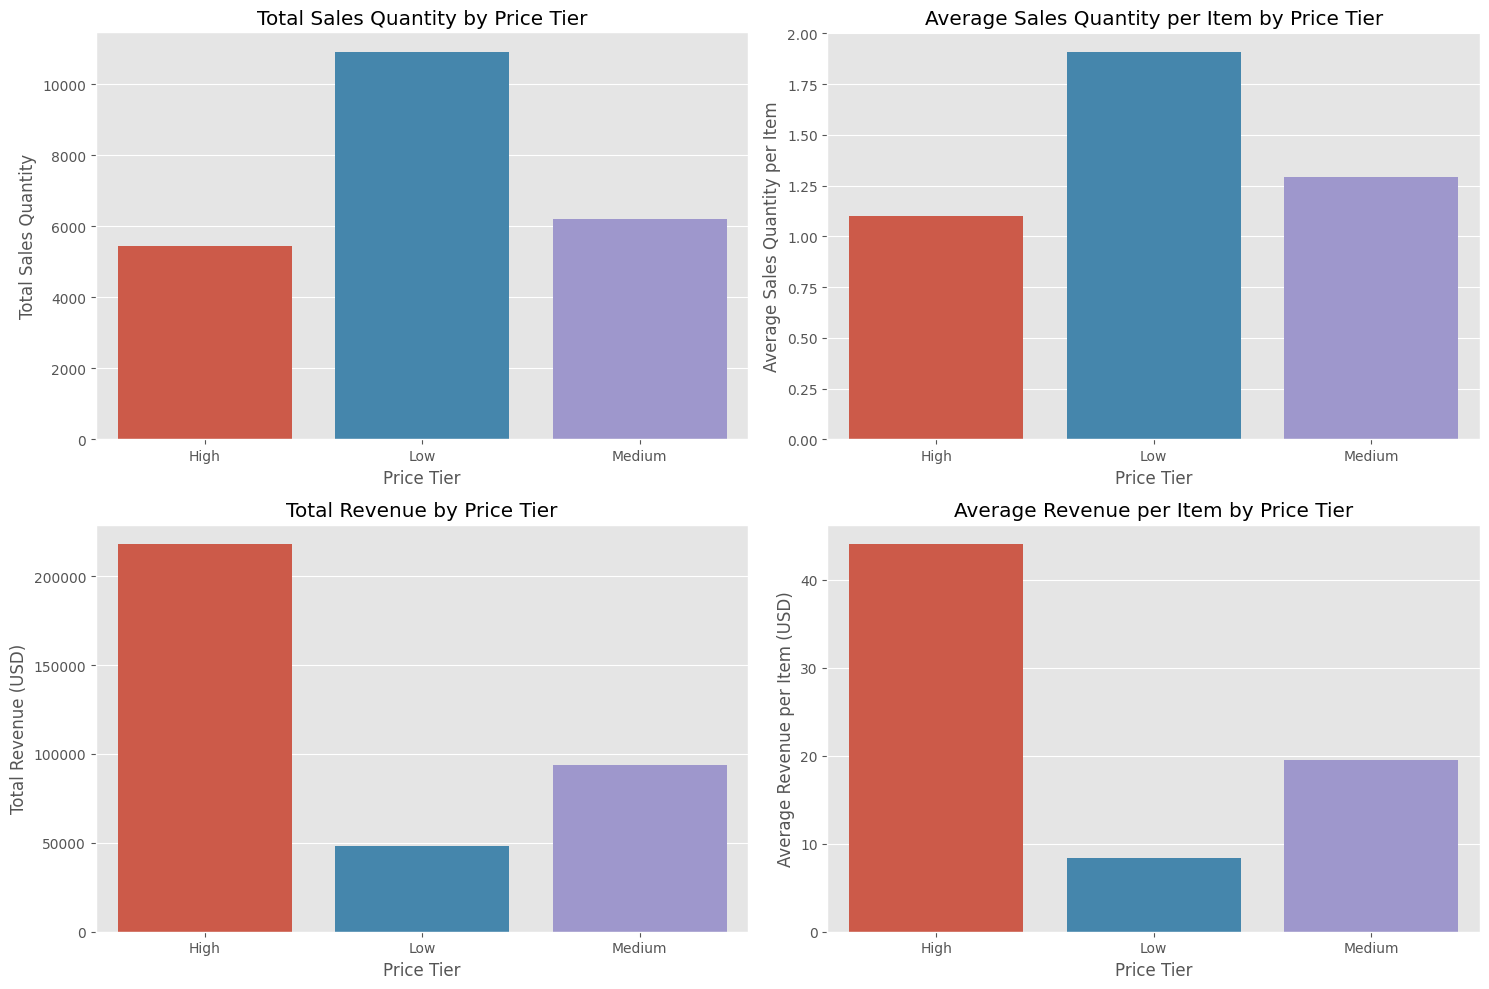

In [37]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

# Plotting the metrics
sns.barplot(data=sales_performance, x='price_tier', y='total_sales_quantity', ax=axes[0, 0])
axes[0, 0].set_title('Total Sales Quantity by Price Tier')
axes[0, 0].set_ylabel('Total Sales Quantity')
axes[0, 0].set_xlabel('Price Tier')

sns.barplot(data=sales_performance, x='price_tier', y='avg_sales_quantity_per_item', ax=axes[0, 1])
axes[0, 1].set_title('Average Sales Quantity per Item by Price Tier')
axes[0, 1].set_ylabel('Average Sales Quantity per Item')
axes[0, 1].set_xlabel('Price Tier')

sns.barplot(data=sales_performance, x='price_tier', y='total_revenue', ax=axes[1, 0])
axes[1, 0].set_title('Total Revenue by Price Tier')
axes[1, 0].set_ylabel('Total Revenue (USD)')
axes[1, 0].set_xlabel('Price Tier')

sns.barplot(data=sales_performance, x='price_tier', y='avg_revenue_per_item', ax=axes[1, 1])
axes[1, 1].set_title('Average Revenue per Item by Price Tier')
axes[1, 1].set_ylabel('Average Revenue per Item (USD)')
axes[1, 1].set_xlabel('Price Tier')

plt.tight_layout()
plt.show()



---



### **Correlation Analysis: By Category**

In [38]:
# Calculating the correlation between 'price_in_usd' and 'sold_quantity_on_that_date' for each category

correlation_by_category = df.groupby('item_category').apply(
    lambda group: group['price_in_usd'].corr(group['sold_quantity_on_that_date'])
)
correlation_by_category

item_category
Accessories               -0.130107
Apparel                   -0.071256
Bags                      -0.079107
Campus Collection         -0.121199
Clearance                 -0.147251
Drinkware                 -0.024268
Electronics Accessories   -0.128641
Gift Cards                 0.240917
Google                    -0.046668
Lifestyle                 -0.078543
New                       -0.068804
Notebooks & Journals       0.139968
Office                    -0.108116
Shop by Brand             -0.209038
Small Goods               -0.176546
Stationery                -0.032955
Uncategorized Items       -0.240153
Writing Instruments       -0.056420
dtype: float64



---



### **Correlation Analysis: Visualisation**

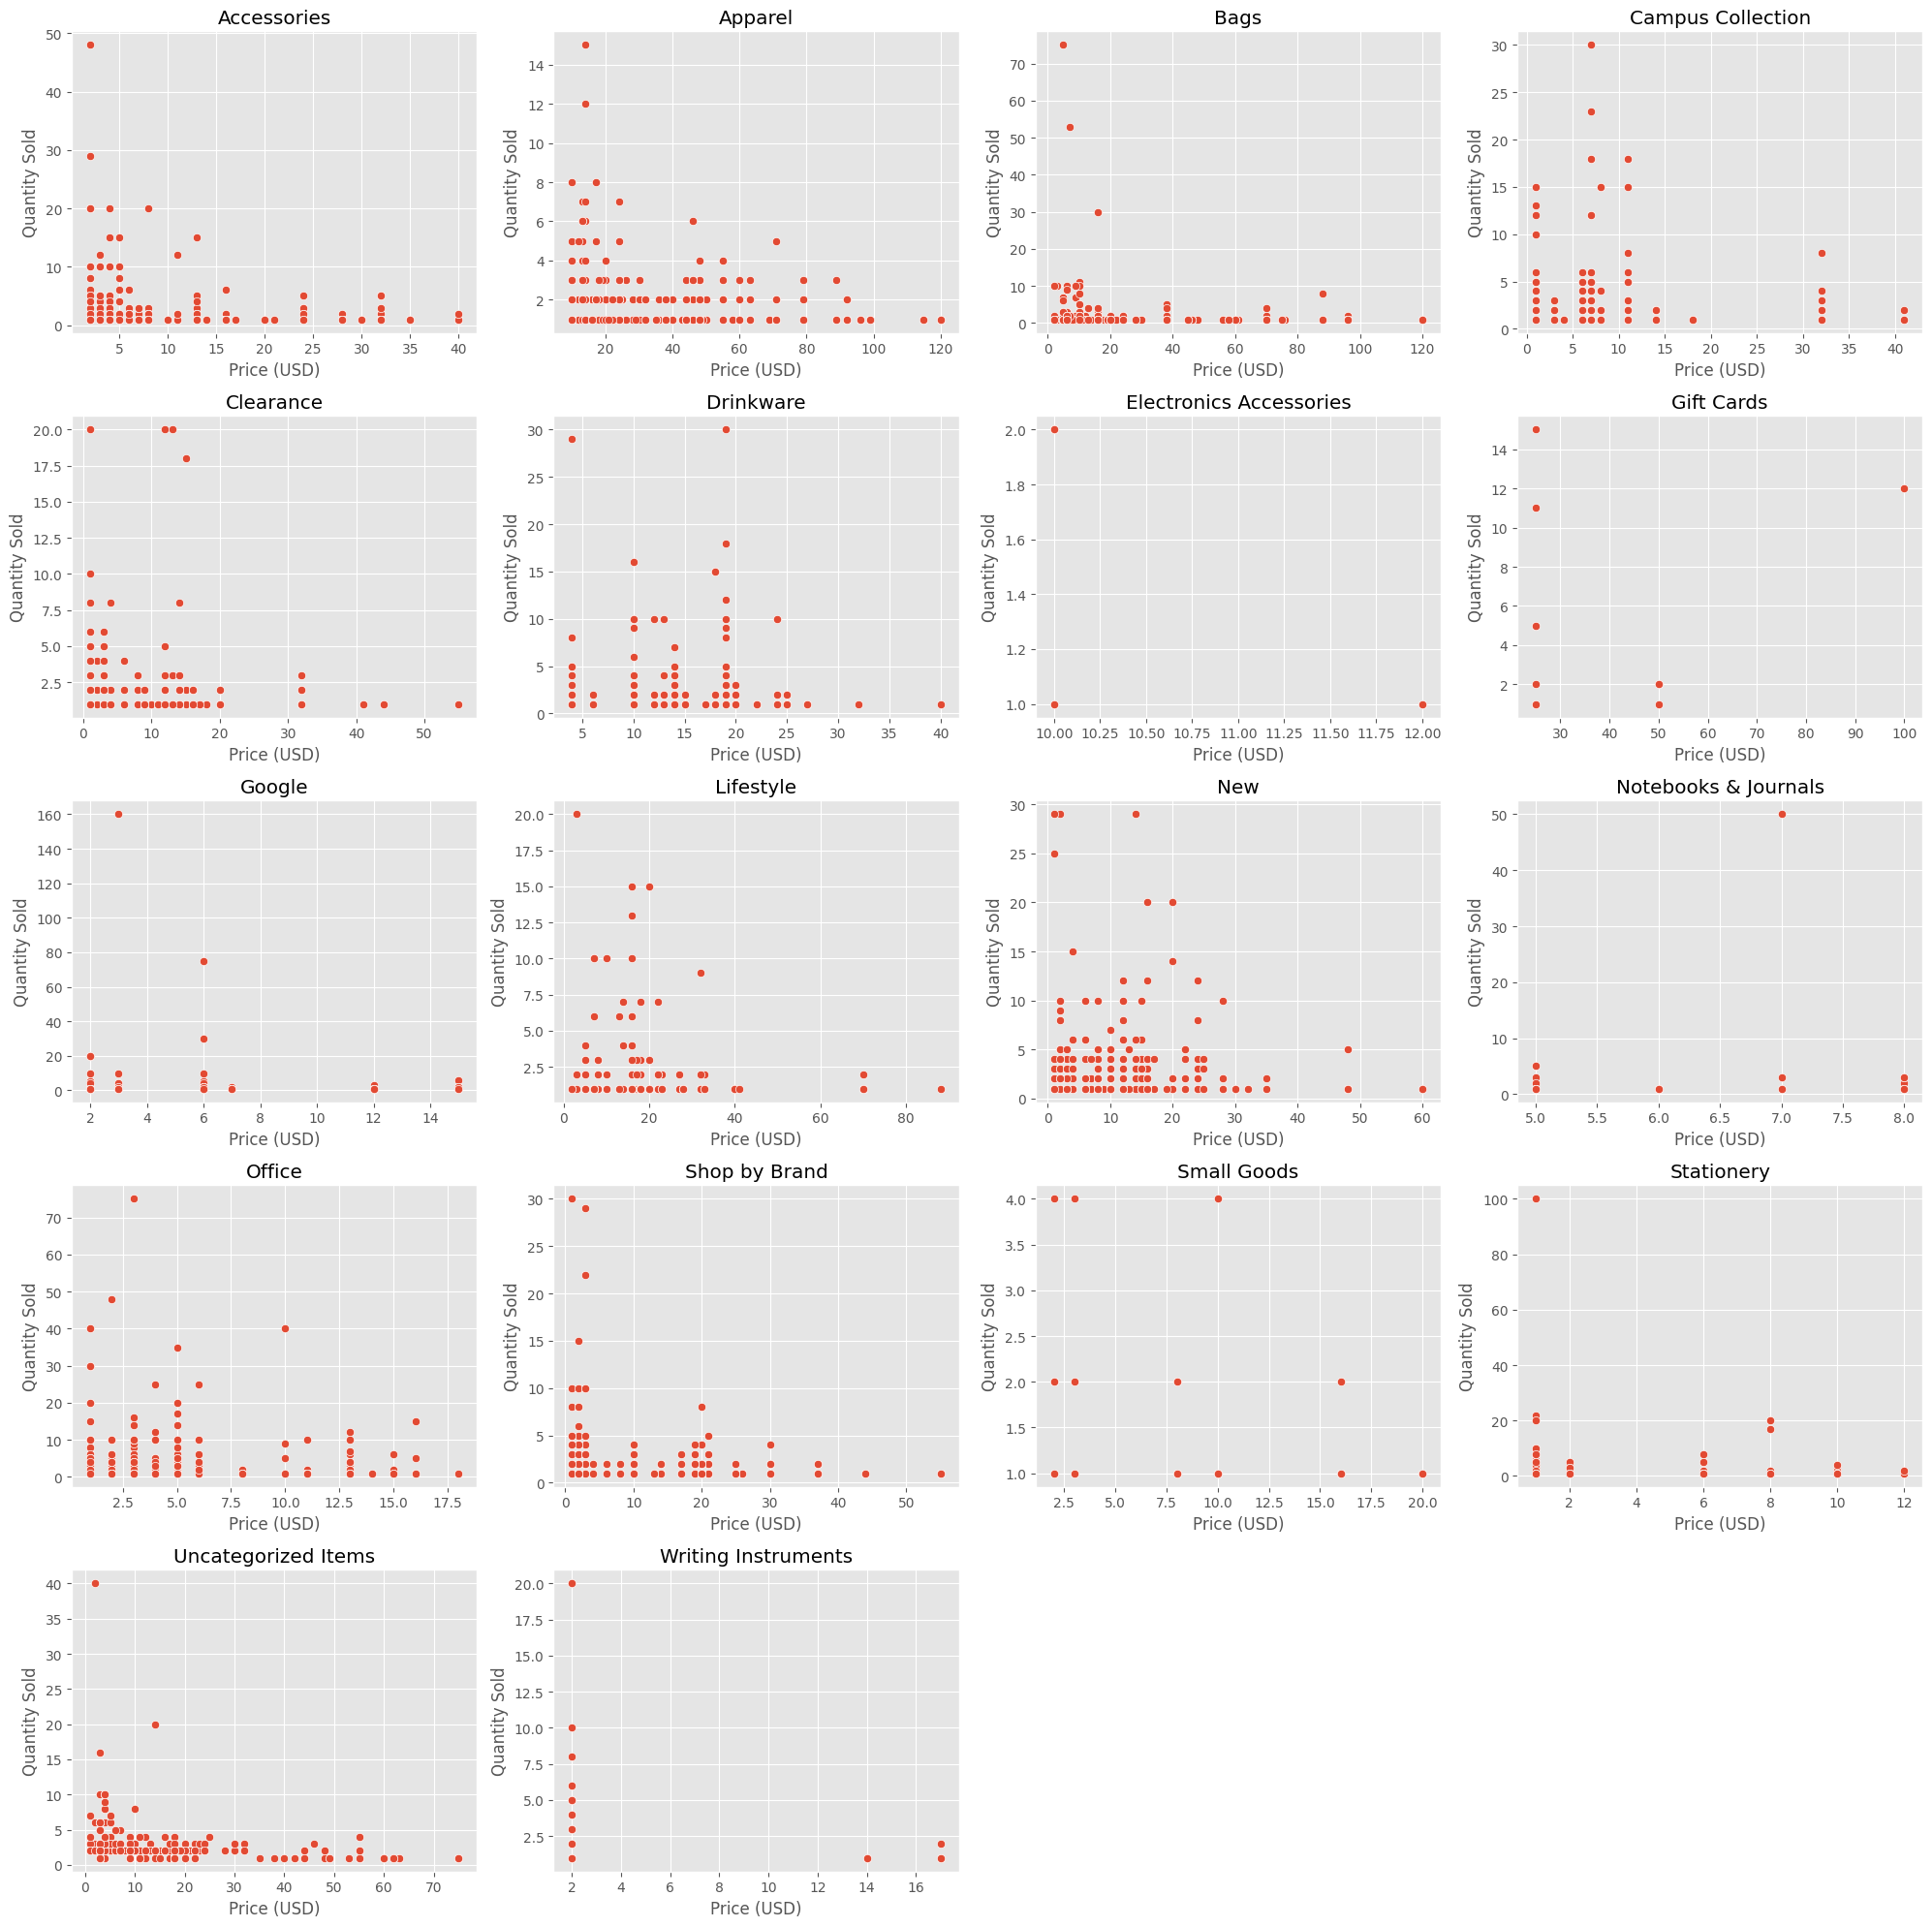

In [39]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
fig.subplots_adjust(hspace=0.5)

# Flatten the axes array for easy iteration
flat_axes = axes.flatten()

# Plot scatter plots for each category
for ax, category in zip(flat_axes, correlation_by_category.index):
    category_data = df[df['item_category'] == category]
    sns.scatterplot(data=category_data, x='price_in_usd', y='sold_quantity_on_that_date', ax=ax)
    ax.set_title(category)
    ax.set_ylabel('Quantity Sold')
    ax.set_xlabel('Price (USD)')

# Remove any remaining unused subplots
for ax in flat_axes[len(correlation_by_category):]:
    ax.remove()

plt.tight_layout()
plt.show()



---

